# 企業の論文データ解析

各社のExcelシートを読み込みます。

まず、各社の論文の平均後方引用数を比較してみます。

In [99]:
backwardcitation_h=df_hitachi.iloc[:,10]
backwardcitation_h.mean()

8.038929440389294

In [100]:
backwardcitation_p=df_panasonic.iloc[:,10]
backwardcitation_p.mean()

21.60822510822511

In [101]:
backwardcitation_s=df_sony.iloc[:,10]
backwardcitation_s.mean()

10.018666666666666

平均後方引用数はPanasonicが一番多いことがわかりました。<br>
そこでまずPanasonicに注目して前方引用数、後方引用数、Web of Science Categoryの変数を取り込みます。

In [102]:
forwardcitation_p=df_panasonic.iloc[:,9]
backwardcitation_p=df_panasonic.iloc[:,10]
category_p=df_panasonic.iloc[:,12]
dataset_p=pd.concat([forwardcitation_p,backwardcitation_p, category_p], axis=1)

取りこんだPanasonicのdataframeの統計量を確認します。

In [103]:
dataset_p.describe()

,NR,TC
count,462.000000,462.000000
mean,26.415584,21.608225
std,15.105142,100.507455
min,0.000000,0.000000
25%,16.250000,1.000000
50%,25.000000,4.000000
75%,34.000000,10.000000
max,122.000000,1474.000000


後方引用数の多いものから降順にdataframeを並び替え、上位２０個までを
表示します。

In [104]:
tc_data_p=dataset_p.sort_values('TC',ascending=False)
tc_data_p.head(20)

,NR,TC,WC
187,64,1474,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
113,33,1157,Multidisciplinary Sciences
303,17,576,"Energy & Fuels; Materials Science, Multidiscip..."
376,11,475,"Energy & Fuels; Materials Science, Multidiscip..."
271,36,470,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
170,57,399,"Energy & Fuels; Materials Science, Multidiscip..."
193,58,314,Multidisciplinary Sciences
181,33,256,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
404,34,170,"Engineering, Electrical & Electronic; Physics,..."
377,38,157,"Materials Science, Multidisciplinary; Physics,..."


Web of Science Categoryに'Energy'や’Chemistry’が含まれるものが多いように見受けられます。<br>
そこでCategoryに'Energy'が含まれる論文のdataframeを作成します。

In [105]:
energ_data_p=tc_data_p.query('WC.str.contains("Energy")', engine='python')
energ_data_p

,NR,TC,WC
187,64,1474,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
303,17,576,"Energy & Fuels; Materials Science, Multidiscip..."
376,11,475,"Energy & Fuels; Materials Science, Multidiscip..."
271,36,470,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
170,57,399,"Energy & Fuels; Materials Science, Multidiscip..."
181,33,256,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
326,15,142,"Chemistry, Physical; Electrochemistry; Energy ..."
79,69,107,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
272,34,91,"Chemistry, Multidisciplinary; Energy & Fuels; ..."
188,37,73,"Chemistry, Multidisciplinary; Energy & Fuels; ..."


dataframeの数と値の合計を確認します。

In [106]:
energ_data_p.sum()

NR                                                 1071
TC                                                 4487
WC    Chemistry, Multidisciplinary; Energy & Fuels; ...
dtype: object

In [107]:
energ_data_p.count()

NR    30
TC    30
WC    30
dtype: int64

次にSony、日立でも同様に後方引用数を降順にdataframeを並び替え、上位２０個までを
表示します。

In [108]:
#Sonyの場合
forwardcitation_s=df_sony.iloc[:,9]
backwardcitation_s=df_sony.iloc[:,10]
category_s=df_sony.iloc[:,12]
dataset_s=pd.concat([forwardcitation_s,backwardcitation_s, category_s], axis=1)

tc_data_s=dataset_s.sort_values('TC',ascending=False)
tc_data_s.head(20)

,NR,TC,WC
354,23,238,"Physics, Applied"
372,39,88,"Engineering, Electrical & Electronic"
367,29,88,"Engineering, Electrical & Electronic"
123,28,82,"Engineering, Electrical & Electronic; Telecomm..."
283,80,75,Neurosciences
304,30,74,"Chemistry, Multidisciplinary; Chemistry, Physi..."
136,69,64,Multidisciplinary Sciences
330,36,63,"Chemistry, Physical; Physics, Atomic, Molecula..."
227,80,63,Cardiac & Cardiovascular Systems; Cell Biology
310,44,62,Biochemistry & Molecular Biology; Materials Sc...


Sonyの場合は'Engineering'や'Chemistry'が含まれるものが多いように見受けられます。

In [109]:
#日立の場合
forwardcitatio_h=df_hitachi.iloc[:,9]
backwardcitation_h=df_hitachi.iloc[:,10]
category_h=df_hitachi.iloc[:,12]
dataset_h=pd.concat([forwardcitatio_h,backwardcitation_h, category_h], axis=1)

tc_data_h=dataset_h.sort_values('TC',ascending=False)
tc_data_h.head(20)

,NR,TC,WC
885,269,603,"Physics, Multidisciplinary"
1616,302,459,"Computer Science, Information Systems; Telecom..."
693,117,360,Nanoscience & Nanotechnology; Materials Scienc...
712,33,274,Multidisciplinary Sciences
1932,34,267,"Automation & Control Systems; Engineering, Ele..."
1870,33,266,"Chemistry, Multidisciplinary"
2047,32,220,"Chemistry, Physical; Materials Science, Multid..."
1977,57,202,Plant Sciences; Cell Biology
1228,20,199,"Cardiac & Cardiovascular Systems; Radiology, N..."
1187,21,165,Cardiac & Cardiovascular Systems


日立の場合は特定のカテゴリの論文が多いというよりは、種類が多様に見受けられます。<br>
今回は、３社の中で論文の平均後方引用数の最も多かったPanasonicの後方引用数上位論文で多くみられたカテゴリである、'Energy'に注目し<br>
'Energy'がカテゴリに含まれる論文の前方引用数と後方引用数の関係を各社で分析します。

In [110]:
energ_data_s=tc_data_s.query('WC.str.contains("Energy")', engine='python')
energ_data_s

,NR,TC,WC
110,23,19,"Energy & Fuels; Engineering, Electrical & Elec..."
244,15,18,"Energy & Fuels; Materials Science, Multidiscip..."
299,46,13,"Chemistry, Physical; Electrochemistry; Energy ..."
217,42,11,"Chemistry, Physical; Electrochemistry; Energy ..."
82,49,9,"Chemistry, Physical; Electrochemistry; Energy ..."
246,20,6,"Chemistry, Physical; Electrochemistry; Energy ..."
311,40,5,Economics; Energy & Fuels; Environmental Scien...


In [111]:
energ_data_h=tc_data_h.query('WC.str.contains("Energy")', engine='python')
energ_data_h

,NR,TC,WC
954,61,41,"Energy & Fuels; Engineering, Chemical"
997,24,32,"Chemistry, Physical; Electrochemistry; Energy ..."
1073,49,29,"Chemistry, Physical; Energy & Fuels; Materials..."
967,60,29,"Energy & Fuels; Engineering, Chemical"
1243,26,26,"Thermodynamics; Energy & Fuels; Engineering, C..."
1661,48,26,"Chemistry, Physical; Electrochemistry; Energy ..."
739,30,20,"Chemistry, Applied; Energy & Fuels; Engineerin..."
572,45,19,Energy & Fuels
1709,34,19,Agricultural Engineering; Biotechnology & Appl...
1301,28,17,"Chemistry, Physical; Electrochemistry; Energy ..."


前方引用数と後方引用数でヒストグラムを作成し、相関係数とp値を表示します。

/Users/yutopia/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


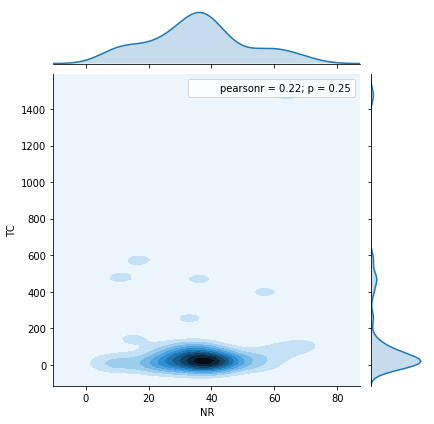

In [112]:
import seaborn as sns
from scipy import stats
#Panasonicの場合
sns.jointplot(data=energ_data_p, x="NR", y="TC", kind='kde').annotate(stats.pearsonr)

他２社よりも後方引用が多い外れ値がいくつかみられます。

/Users/yutopia/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


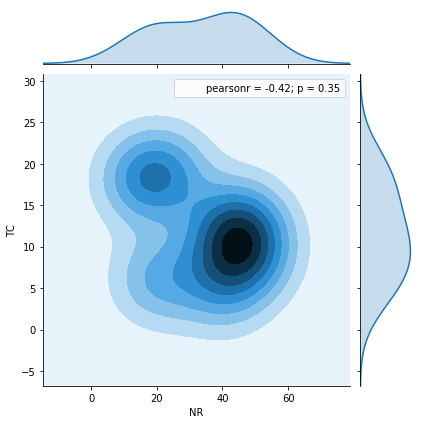

In [113]:
#Sonyの場合
sns.jointplot(data=energ_data_s, x="NR", y="TC", kind='kde').annotate(stats.pearsonr)

Sonyの場合は全体的に前方引用数が多くて後方引用数が少なく分布しています。相関係数も−0.42で負の値を示しています。

/Users/yutopia/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


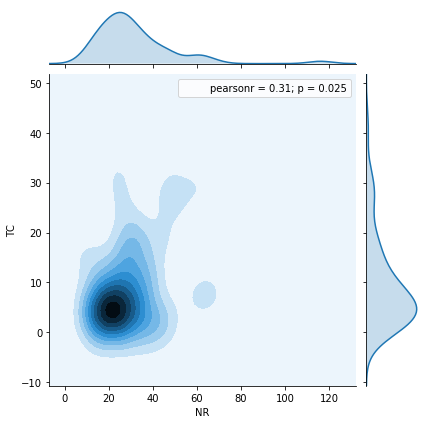

In [114]:
#日立の場合
sns.jointplot(data=energ_data_h, x="NR", y="TC", kind='kde').annotate(stats.pearsonr)

各社ごとに後方引用数でヒストグラムを作成します。

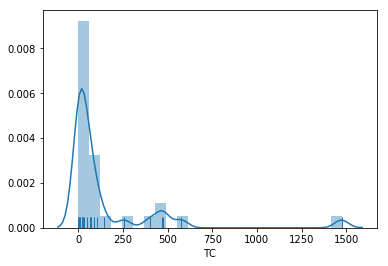

In [115]:
#Panasonicの場合
sns.distplot(energ_data_p["TC"], rug=True,)

カイ二乗分布に近い形をしています。

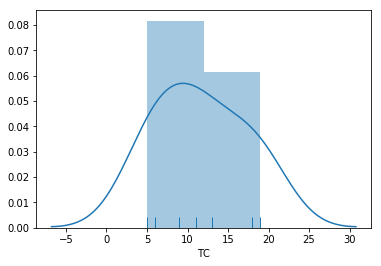

In [116]:
#Sonyの場合
sns.distplot(energ_data_s["TC"], rug=True,)

Sonyの場合は正規分布に近い形をしています。

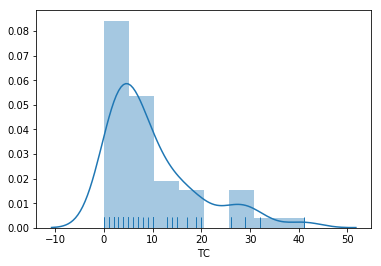

In [117]:
#日立の場合
sns.distplot(energ_data_h["TC"], rug=True,)

日立の場合は右裾の長い分布をしています。